In [31]:
import pandas as pd

In [32]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [33]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [34]:
df = df.iloc[:, 2:]

In [35]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [36]:
df.shape

(400, 3)

In [37]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

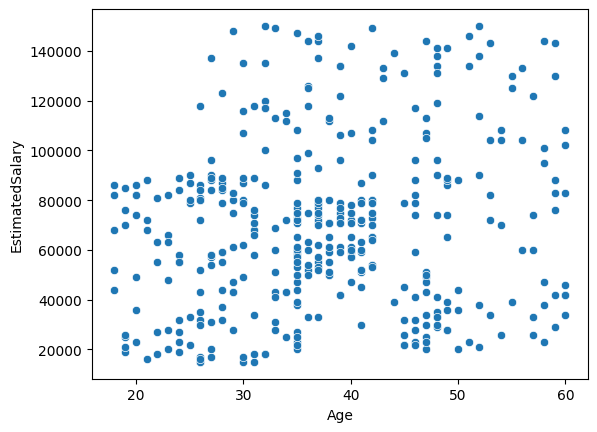

In [38]:
sns.scatterplot(x='Age', y='EstimatedSalary', data=df)

In [39]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [40]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [41]:
y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [43]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [44]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4646 - loss: 611.1899 - val_accuracy: 0.3375 - val_loss: 278.7947
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3893 - loss: 202.0873 - val_accuracy: 0.3375 - val_loss: 153.1417
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5470 - loss: 65.0541 - val_accuracy: 0.3375 - val_loss: 40.0485
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4848 - loss: 36.6183 - val_accuracy: 0.6625 - val_loss: 66.2724
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4897 - loss: 85.4204 - val_accuracy: 0.6625 - val_loss: 30.3601
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4400 - loss: 118.5047 - val_accuracy: 0.6625 - val_loss: 147.2956
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5262 - loss: 105.0833 - val_accuracy: 0.6625 - val_loss: 42.9431
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5573 - loss: 40.3313

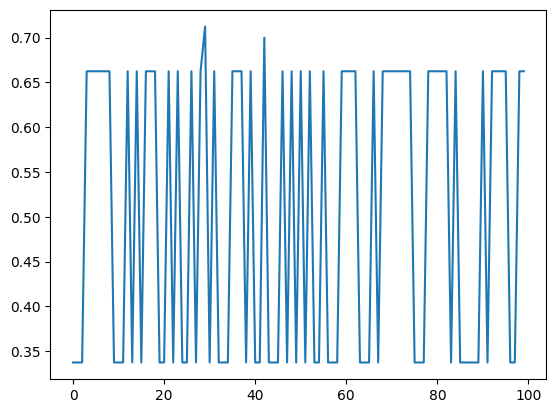

In [48]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

# Applying scaling

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [50]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

<Axes: >

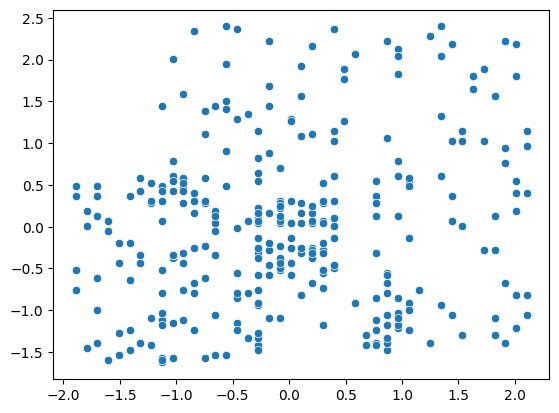

In [52]:
sns.scatterplot(x=X_train_scaled[:,0], y=X_train_scaled[:,1])

In [53]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.5255 - loss: 0.6940 - val_accuracy: 0.7375 - val_loss: 0.6536
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8356 - loss: 0.6344 - val_accuracy: 0.7875 - val_loss: 0.6028
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8512 - loss: 0.5783 - val_accuracy: 0.8000 - val_loss: 0.5602
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8393 - loss: 0.5434 - val_accuracy: 0.8125 - val_loss: 0.5249
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8249 - loss: 0.5124 - val_accuracy: 0.8125 - val_loss: 0.4937
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8446 - loss: 0.4806 - val_accuracy: 0.8250 - val_loss: 0.4658
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8227 - loss: 0.4581 - val_accuracy: 0.8250 - val_loss: 0.4411
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8656 - loss: 0.4167 - val_accuracy: 0.8375 - val_l

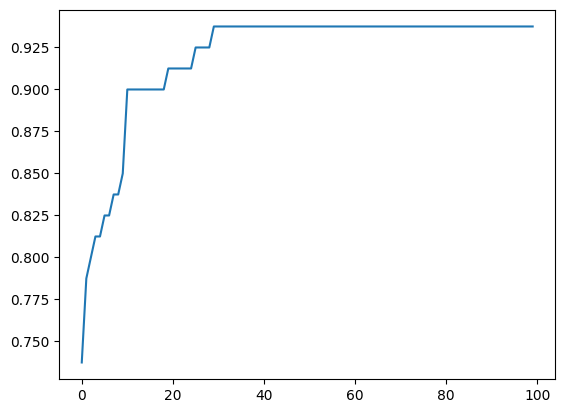

In [54]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])